In [3]:
import pandas as pd
from models.rnn import build_rnn_model
from preprocessing.rnn import preprocess as rnn_preprocess
from preprocessing.rnn import train_test_split_sequence as rnn_split
from evaluation.model_evaluation import run_model_evaluation
import keras
import numpy as np

df = pd.read_csv(
    "data\\household_power_consumption_1867734.csv",
    parse_dates={"dt": ["Date", "Time"]},
    infer_datetime_format=True,
    low_memory=False,
)

C:\Users\raniz\AppData\Local\Temp\ipykernel_12492\4199666855.py:9: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv(
C:\Users\raniz\AppData\Local\Temp\ipykernel_12492\4199666855.py:9: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(


In [4]:
df.isna()

,dt,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
207521,False,False,False,False,False,False,False,False
207522,False,False,False,False,False,False,False,False
207523,False,False,False,False,False,False,False,False
207524,False,False,False,False,False,False,False,False


In [5]:
df.isna().sum()

dt                           0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           12465
dtype: int64

In [6]:
df.replace("?", np.nan, inplace=True)
df.dropna(inplace=True)

In [7]:
df.isna().sum()

dt                       0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [8]:
sequence_length = 60
X, y = rnn_preprocess(df, sequence_length)

In [9]:
X_train, X_test, y_train, y_test = rnn_split(X, y)

In [ ]:
rnn_model = build_rnn_model(sequence_length, X_train)

c:\Afeka\Afeka_DL_course_labs\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)
history = rnn_model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
)

Epoch 1/10
2438/2438 ━━━━━━━━━━━━━━━━━━━━ 28s 11ms/step - loss: 8.0828e-04 - val_loss: 5.4875e-04
Epoch 2/10
2438/2438 ━━━━━━━━━━━━━━━━━━━━ 27s 11ms/step - loss: 5.0436e-04 - val_loss: 5.4737e-04
Epoch 3/10
2438/2438 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - loss: 4.8394e-04 - val_loss: 5.6093e-04
Epoch 4/10
2438/2438 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - loss: 4.9358e-04 - val_loss: 5.3907e-04
Epoch 5/10
2438/2438 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - loss: 4.9127e-04 - val_loss: 6.3517e-04
Epoch 6/10
2438/2438 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - loss: 4.7167e-04 - val_loss: 5.4282e-04
Epoch 7/10
2438/2438 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - loss: 4.7043e-04 - val_loss: 5.7267e-04


In [ ]:

# Evaluate the model
loss = rnn_model.evaluate(X_test, y_test)
print(f"Test loss: {loss}")


1219/1219 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 5.2814e-04
Test loss: 0.0005726656527258456


In [ ]:
# Make predictions
predictions = rnn_model.predict(X_test)

1219/1219 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step


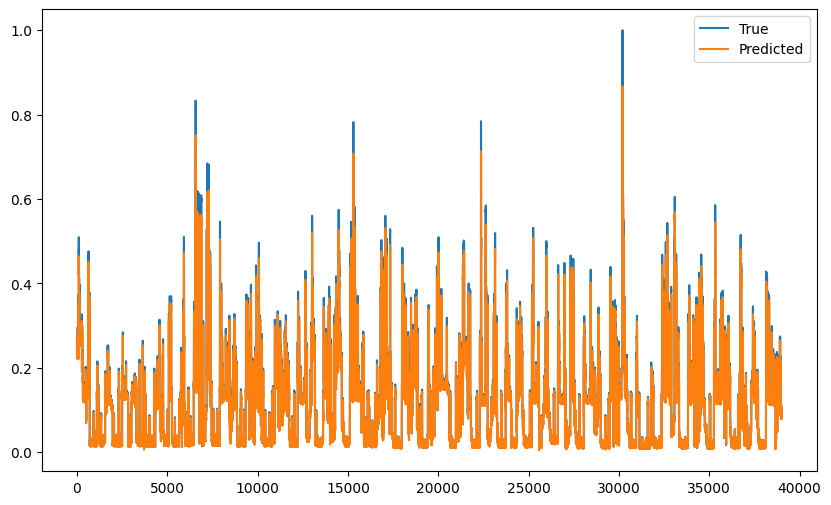

In [ ]:
# Plotting results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test, label="True")
plt.plot(predictions, label="Predicted")
plt.legend()
plt.show()

In [ ]:
rnn_results = run_model_evaluation(y_test, predictions)

In [ ]:
rnn_results

{'Mean Absolute Error (MAE)': 0.00951549651948125,
 'Mean Squared Error (MSE)': 0.0005726658075567377,
 'Root Mean Squared Error (RMSE)': 0.023930436844252084,
 'R-squared (R²) value': 0.9466676280726537}

In [2]:
from data_modification.modifications import add_noise, scale_data, shift_data, window_slicing

In [24]:
X_combined = np.concatenate([X, add_noise(X), scale_data(X), shift_data(X), x2], axis=0)
y_combined = np.concatenate([y, y, y, y, y], axis=0)

In [25]:
X_train_augment, X_test_augment, y_train_augment, y_test_augment = rnn_split(X_combined, y_combined)

In [26]:
rnn_model = build_rnn_model(sequence_length, X_train_augment)

c:\Afeka\Afeka_DL_course_labs\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)
history = rnn_model.fit(
    X_train_augment,
    y_train_augment,
    epochs=10,
    batch_size=64,
    validation_data=(X_test_augment, y_test_augment),
    callbacks=[early_stopping],
)

Epoch 1/10
12188/12188 ━━━━━━━━━━━━━━━━━━━━ 115s 9ms/step - loss: 0.0016 - val_loss: 0.0068
Epoch 2/10
12188/12188 ━━━━━━━━━━━━━━━━━━━━ 121s 10ms/step - loss: 0.0016 - val_loss: 0.0060
Epoch 3/10
12188/12188 ━━━━━━━━━━━━━━━━━━━━ 107s 9ms/step - loss: 0.0016 - val_loss: 0.0062
Epoch 4/10
12188/12188 ━━━━━━━━━━━━━━━━━━━━ 109s 9ms/step - loss: 0.0016 - val_loss: 0.0064
Epoch 5/10
12188/12188 ━━━━━━━━━━━━━━━━━━━━ 114s 9ms/step - loss: 0.0016 - val_loss: 0.0064


In [28]:
# Make predictions
predictions = rnn_model.predict(X_test_augment)

6094/6094 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step


In [29]:
run_model_evaluation(y_test_augment, predictions)

{'Mean Absolute Error (MAE)': 0.05026616745534624,
 'Mean Squared Error (MSE)': 0.006419256444212348,
 'Root Mean Squared Error (RMSE)': 0.0801202623823234,
 'R-squared (R²) value': 0.22061831168191548}

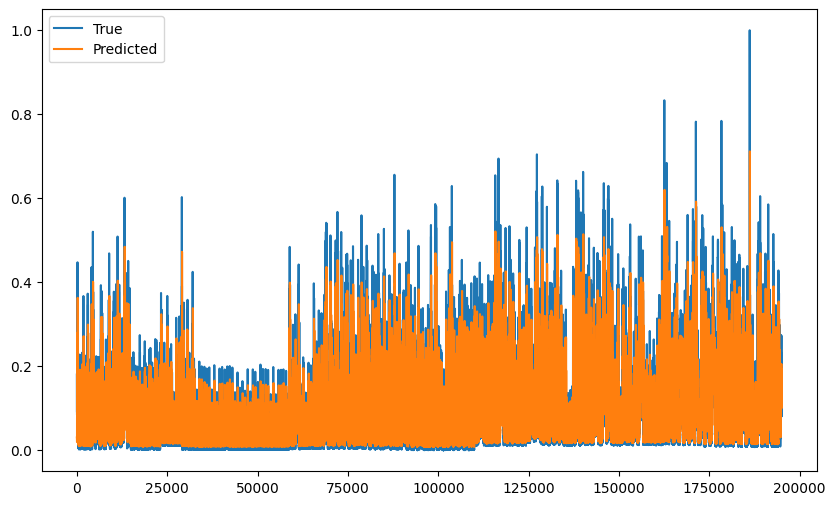

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(y_test_augment, label="True")
plt.plot(predictions, label="Predicted")
plt.legend()
plt.show()